In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Camada:
    def __init__(self, n_entradas, n_neuronios):
        self.pesos = 0.01 * np.random.randn(n_entradas, n_neuronios)
        self.vies = np.zeros((1, n_neuronios))

    def forward(self, entradas):
        saida = np.tanh(np.dot(entradas, self.pesos) + self.vies)
        return saida
    
    def backward(self, gradiente_saida, taxa_aprendizado):        
        gradiente_+pesos = np.dot(self.entradas.T, gradiente_saida)
        gradiente_vies = np.sum(gradiente_saida, axis=0, keepdims=True)
        gradiente_entradas = np.dot(gradiente_saida, self.pesos.T)

        self.pesos -= taxa_aprendizado * gradiente_pesos
        self.vies -= taxa_aprendizado * gradiente_vies

        return gradiente_entradas




In [43]:
class RedeNeural:
    def __init__(self, n_entradas, n_oculta, n_saida):
        self.camada_entrada = Camada(n_entradas, n_oculta)
        self.camada_oculta = Camada(n_oculta, n_saida)
        self.camada_saida = Camada(n_saida, 1)

    def predict(self, X):
        x1 = self.camada_entrada.forward(X)
        x2 = self.camada_oculta.forward(x1)
        out = self.camada_saida.forward(x2)
        return out
    
    def atualizar_pesos(self, gradiente_saida, taxa_aprendizado):
        gradiente_saida = self.camada_saida.backward(gradiente_saida, taxa_aprendizado)
        gradiente_oculta = self.camada_oculta.backward(gradiente_saida, taxa_aprendizado)
        gradiente_entrada = self.camada_entrada.backward(gradiente_oculta, taxa_aprendizado)

        return gradiente_entrada

    def treinar(self, X, y, taxa_aprendizado, epochs):
        historico_erro = []

        for epoch in range(epochs):
            out = self.predict(X)

            erro_medio = np.mean((out - y) ** 2)
            historico_erro.append(erro_medio)

            erro = (1 / 500) * np.abs((out - y) ** 2)

            self.atualizar_pesos(erro, taxa_aprendizado)

            #if epoch % 100 == 0:
            #    print(f'Época {epoch}, Erro: {erro}')

        # print(f'Final do treinamento. Erro final: {erro}')

        return historico_erro


C:\Users\jeyso\AppData\Local\Temp\ipykernel_19492\2548977174.py:26: RuntimeWarning: overflow encountered in square
  erro_medio = np.mean((out - y) ** 2)
C:\Users\jeyso\AppData\Local\Temp\ipykernel_19492\2548977174.py:29: RuntimeWarning: overflow encountered in square
  erro = (1 / 500) * np.abs((out - y) ** 2)


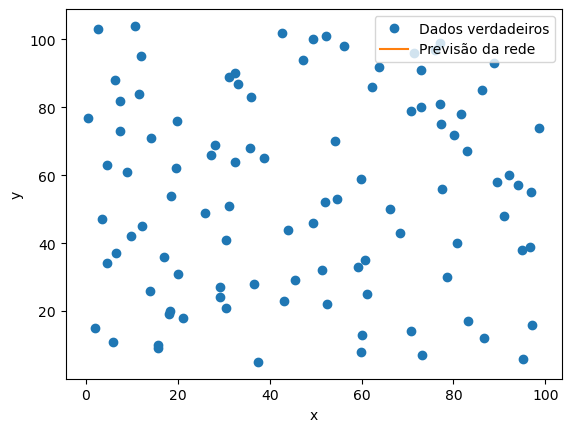

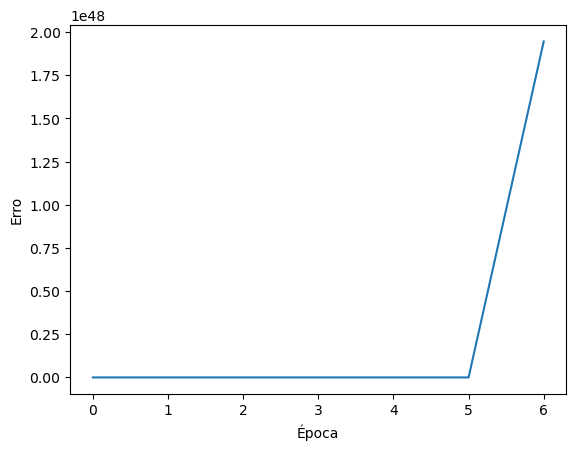

In [44]:
import matplotlib.pyplot as plt

# Teste com os dados fornecidos
import numpy as np

np.random.seed(42)
x = 100 * np.random.rand(100, 1) # np.array([[1], [2], [3], [4], [5]])
y = np.arange(5, 105, 1).reshape((-1, 1))#np.array([[5], [7], [9], [11], [13]])

rn = RedeNeural(1, 30, 1)
historico_erro = rn.treinar(x, y, 0.001, 1000)

previsao = rn.predict(x)

plt.plot(x, y, 'o', label='Dados verdadeiros')
plt.plot(x, previsao, label='Previsão da rede')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plotar a reta
x_range = np.linspace(min(x), max(x), 100)
y_range = rn.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_range, label='Reta prevista', color='red')

plt.show()

plt.plot(historico_erro)
plt.xlabel('Época')
plt.ylabel('Erro')
plt.show()

